In [1]:
import random
import string
import abc
from datetime import datetime
from models import *
from functions import *


f:\Python Projects\Parcial 2 ADA\flask-app\app


In [2]:
rand_str = lambda l : rand_str(l-1)+random.choice(string.ascii_lowercase) if l > 1 else random.choice(string.ascii_lowercase)
rand_str(10)

'ucrwrqojha'

In [3]:
import pandas as pd

In [4]:
PRODUCTS = (SavingAccount,FixedTermDeposit,Loan,CreditCard)

### FUNCIONES

In [5]:
prueba = lambda s: s if (len(df_transactions[df_transactions['id']==s])) == 0 else prueba(random.choice(range(100000,999999)))

In [6]:

def generate_product_ids():
  id = ''
  while (id in ids or id == ''):
    id = str(random.choice(range(1000000,9999999)))
  product_ids.append(id)
  return id   


In [7]:

def generate_credit_card_number():
  id = ''
  while (id in ids or id == ''):
    id = str(random.choice(range(1000000000000000,9999999999999999)))
  product_ids.append(id)
  return id   


In [8]:

def generate_transaction_id():
  id = ''
  while (id in ids or id == ''):
    id = str(random.choice(range(100000,9999999)))
  transaction_ids.append(id)
  return id   


In [9]:

def generate_client_id():
  id = ''
  while (id in ids or id == ''):
    id = str(random.choice(range(1,11)))+"-"+ str(random.choice(range(100,999)))+"-"+ str(random.choice(range(1,999)))
  ids.append(id)
  return id   


In [10]:
def generate_saving_accounts(n):
  accs = []
  for i in range(n):
    accs.append(SavingAccount(
        id = generate_product_ids()
    ))
  return accs

In [11]:
def generate_clients(n):
  clients = []
  for i in range(n):
    clients.append(Client(
        id = generate_client_id(),
        name = rand_str(10) +" "+rand_str(15),
        products = []
    ))
  return clients


In [12]:
def generate_balance():
  n = random.choice(range(0,500000))
  cash= ("${:5.2f}".format(n))
  return cash

## Generar Entidades

In [13]:
%%time
ids = []
product_ids = []
clientes = generate_clients(1000)
products = []
# POR CADA PRODUCTO GENERADO...
for cliente in clientes:
  # SELECCIONO UNA CANTIDAD DE PRODUCTOS ALEATORIAMENTE
  cantidad_productos = random.choice(range(1,5))
  
  # POR LA CANTIDAD DE PRODUCTOS SELECCIONADOS...
  for p in range(0,cantidad_productos):    

    # SELECCIONO ALEATORIAMENTE UN TIPO DE PRODUCTO
    tipo_producto = PRODUCTS[random.choice(range(0,len(PRODUCTS)))]

    # INSTANCIO EL PRODUCTO
    if tipo_producto is Loan:
      producto = tipo_producto(
          id=generate_product_ids(),
          interest_rate=random.choice(range(3,17)),
          owner = cliente.id,
          base= random.choice([365,360]),
          length = random.choice(range(1,120)))
    elif tipo_producto is CreditCard:
      producto = tipo_producto(
          id=generate_credit_card_number(),
          interest_rate=random.choice(range(1,3)),
          owner = cliente.id
          )
    else:
      producto = tipo_producto(
          id=generate_product_ids(),
          interest_rate=random.choice(range(1,3)),
          owner = cliente.id
          )
 
    # RELACIONO EL PRODUCTO CON EL CLIENTE ACTUAL
    cliente.products.append(producto)
    products.append(producto)
print(type (tipo_producto.balance))

print("Productos generados:",len(products))
print("Clientes generados:",len(clientes))

<class 'property'>
Productos generados: 2443
Clientes generados: 1000
Wall time: 499 ms


In [14]:
products[0].owner

'9-770-967'

## Generar transacciones

In [15]:
%%time
MIN_TRX = 10
MAX_TRX = 100
transactions = []
transaction_ids = []

for cliente in clientes:
  for producto in cliente.products:
    
    if type(producto) is SavingAccount or type(producto) is FixedTermDeposit :
      # SELECCIONAR UN NUMERO ALEATORIO DE TRANSACCIONES PARA CADA PRODUCTO
      n_Trx = random.choice(range(MIN_TRX,MAX_TRX))

      for trx in range(n_Trx):
        month = random.choice(range(1,13))
        # SI EL MES ES FEBRERO... ENTRE 1 Y 28
        if month == 2: day = random.choice(range(1,29))
        # SI EL MES ES PAR EN EL SEGUNDO SEMESTRE O ES IMPAR EN EL PRIMER SEMESTRE... ENTRE 1 Y 31
        elif (month % 2 == 0 and month >= 8) or (month % 2 != 0 and month < 8): day = random.choice(range(1,32))
        # DE CUALQUIER OTRA FORMA... ENTRE 1 Y 30
        else: day = random.choice(range(1,30))
        amt = float(str(random.choice(range(1,999999999)))+"."+str(random.choice(range(1,99))))
        nature = "Dr" if random.choice(range(10))==0 else "Cr"
        mvt = amt*-1 if nature == 'Dr' else amt
        transactions.append(Transaction(
            id = generate_transaction_id(),
            product = producto.id,
            nature = nature,
            date = datetime(random.choice(range(2010,2020+1)),month ,day),
            amt = amt,
            mvt = mvt
        ))

print("Transacciones generadas:",len(transactions))
print("Media de transacción por cliente:",len(transactions)/len(products))

Transacciones generadas: 66455
Media de transacción por cliente: 27.202210397052802
Wall time: 3.65 s


## Generar tablas

In [16]:
df_loans =[]
df_deposits = []
for p in products:
  if type(p) is Loan:
    df_loans.append(p)
  if type(p) is FixedTermDeposit or type(p) is SavingAccount:
    df_deposits.append(p)


In [17]:
df_clients = pd.DataFrame.from_records([l.to_dict() for l in clientes])
df_clients.head(3)

,id,client_name
0,9-770-967,gmqwflnbuh qyvzleobcglzjnl
1,2-691-896,lwgeztuvkl apmeglvjtdukebi
2,10-121-673,qehqnczfkk twqhgefiamscftk


In [18]:
df_loans = pd.DataFrame.from_records([l.to_dict() for l in df_loans])
df_loans.head(3)

,id,interest_rate,balance,owner,type,length,base
0,5791972,6,0.0,9-770-967,Loan,117,365
1,5782327,12,0.0,2-691-896,Loan,49,360
2,9570781,8,0.0,2-691-896,Loan,73,365


In [19]:
df_deposits = pd.DataFrame.from_records([d.to_dict() for d in df_deposits])
df_deposits.head(3)

,id,interest_rate,balance,owner,type
0,2499259,2,0.0,2-691-896,FixedTermDeposit
1,5043420,2,0.0,2-691-896,FixedTermDeposit
2,7389477,1,0.0,10-121-673,FixedTermDeposit


In [20]:
df_transactions = pd.DataFrame.from_records([t.to_dict() for t in transactions])
df_transactions

,id,nature,accounting_date,amount,product,mvt
0,5493388,Dr,2018-07-20,6.040505e+08,2499259,-6.040505e+08
1,3892802,Cr,2016-09-22,2.609471e+08,2499259,2.609471e+08
2,663233,Cr,2015-09-03,7.758831e+07,2499259,7.758831e+07
3,150813,Cr,2017-08-21,2.488960e+08,2499259,2.488960e+08
4,6604468,Cr,2019-07-02,5.618234e+08,2499259,5.618234e+08
...,...,...,...,...,...,...
66450,2972223,Cr,2020-08-03,3.886573e+07,3448732,3.886573e+07
66451,2783587,Cr,2016-12-09,9.079295e+07,3448732,9.079295e+07
66452,9184884,Cr,2016-10-14,4.198347e+08,3448732,4.198347e+08
66453,7147643,Cr,2017-08-13,7.681963e+08,3448732,7.681963e+08


In [21]:
#df_transactions[df_transactions['product']=='1022920']
summarize = df_transactions.groupby(['product'])['mvt']
summarize = summarize.sum()
summarize = summarize.reset_index()
#print(summarize['1022920'==summarize['product']])
for i in range(len(summarize)):
  product_id = summarize['product'].iloc[i]
  
  df_deposits.loc[df_deposits['id']==product_id,'balance'] = summarize['mvt']

df_deposits[df_deposits['id'].isin(summarize['product'])]
#print(df_deposits[summarize['product']==df_deposits['id']])

,id,interest_rate,balance,owner,type
0,2499259,2,2.989434e+10,2-691-896,FixedTermDeposit
1,5043420,2,1.106646e+10,2-691-896,FixedTermDeposit
2,7389477,1,3.227657e+10,10-121-673,FixedTermDeposit
3,4044167,1,3.315725e+10,7-922-948,SavingAccount
4,4294739,1,3.973626e+10,7-922-948,SavingAccount
...,...,...,...,...,...
1220,6100265,1,2.751744e+10,7-360-741,SavingAccount
1221,1229745,2,1.751267e+10,7-360-741,SavingAccount
1222,9500504,1,2.386510e+10,7-360-741,SavingAccount
1223,5963739,2,1.484423e+10,8-812-704,SavingAccount


## Requerimientos


***vas a definir la funcion de ejecutar transferencia***



***tienes que buscar la informacion de las cuentas afectadas en la tabla de productos***


***vas a ver si la cuenta a acreditar tiene saldo***


vas a generar la transaccion en la tabla de transacciones


vas a modificar el balance de las cuentas afectadas en la tabla de productos



### Generar estado de cuenta

In [22]:
def getAccountStatement(**kwargs):
  
  try: kwargs['product']
  except: print("A product id is required")

  
  print("Getting account statement for product",kwargs['product'])
  df = df_transactions[df_transactions['product'] == kwargs['product']]
  
  try: start = kwargs['start'] 
  except: start = df['accounting_date'].min()
  try: end = kwargs['end']
  except: end = df['accounting_date'].max()
  
  df = df[(df.accounting_date >= start) & (df.accounting_date <= end) ]

  print("Found",len(df),"transactions from",start,"to",end)
  df = df.sort_values(by=['accounting_date'])
  df = df.reset_index()
  df = df.drop(['index'],axis=1)
  return df

In [23]:
%%time
account_stmnt = getAccountStatement(product=df_transactions.iloc[0]['product'])
print(account_stmnt)


Getting account statement for product 2499259
Found 63 transactions from 2010-03-22 00:00:00 to 2020-10-10 00:00:00
         id nature accounting_date        amount  product           mvt
0   9912598     Cr      2010-03-22  8.117350e+08  2499259  8.117350e+08
1   2896218     Cr      2010-09-16  2.890298e+08  2499259  2.890298e+08
2    716856     Cr      2010-12-27  3.932733e+08  2499259  3.932733e+08
3   7920488     Cr      2011-01-13  6.258693e+08  2499259  6.258693e+08
4   5168882     Cr      2011-03-21  7.682792e+06  2499259  7.682792e+06
..      ...    ...             ...           ...      ...           ...
58  1127997     Cr      2020-02-19  2.467552e+08  2499259  2.467552e+08
59  3056499     Cr      2020-03-09  5.497470e+08  2499259  5.497470e+08
60   679343     Cr      2020-03-19  5.680082e+08  2499259  5.680082e+08
61  8398009     Cr      2020-06-28  5.367449e+08  2499259  5.367449e+08
62  8345020     Cr      2020-10-10  1.128763e+08  2499259  1.128763e+08

[63 rows x 6 column

#### Mostrar un gráfico con el movimiento de su producto

In [24]:
import matplotlib.pyplot as plt

In [25]:
# generar el campo valor
account_stmnt['mvt'] = 0.00
account_stmnt.loc[account_stmnt['nature']=="Dr",'mvt'] = account_stmnt['amount']
account_stmnt.loc[account_stmnt['nature']=="Cr",'mvt'] = account_stmnt['amount']*-1
account_stmnt.sum()

id         9912598289621871685679204885168882431656286649...
nature     CrCrCrCrCrCrCrCrCrCrCrCrCrCrCrCrCrCrCrCrCrCrCr...
amount                                            2.8253e+10
product    2499259249925924992592499259249925924992592499...
mvt                                              -2.4438e+10
dtype: object

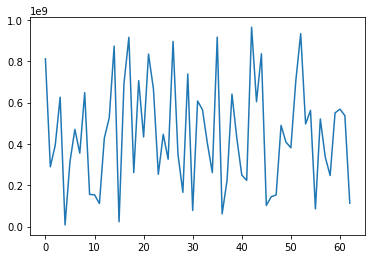

In [26]:
plt.plot(account_stmnt.amount)
plt.show()

### Ejecutar Transferencia

In [27]:
Transfer.Execute(to=df_transactions.iloc[0]['product'], From=df_transactions.iloc[-1]['product'], amount= 4)



Executing Bank Transfer
ERROR


In [28]:
account_stmnt = getAccountStatement(product=df_transactions.iloc[0]['product'])
account_stmnt

Getting account statement for product 2499259
Found 63 transactions from 2010-03-22 00:00:00 to 2020-10-10 00:00:00


,id,nature,accounting_date,amount,product,mvt
0,9912598,Cr,2010-03-22,8.117350e+08,2499259,8.117350e+08
1,2896218,Cr,2010-09-16,2.890298e+08,2499259,2.890298e+08
2,716856,Cr,2010-12-27,3.932733e+08,2499259,3.932733e+08
3,7920488,Cr,2011-01-13,6.258693e+08,2499259,6.258693e+08
4,5168882,Cr,2011-03-21,7.682792e+06,2499259,7.682792e+06
...,...,...,...,...,...,...
58,1127997,Cr,2020-02-19,2.467552e+08,2499259,2.467552e+08
59,3056499,Cr,2020-03-09,5.497470e+08,2499259,5.497470e+08
60,679343,Cr,2020-03-19,5.680082e+08,2499259,5.680082e+08
61,8398009,Cr,2020-06-28,5.367449e+08,2499259,5.367449e+08


### Generar tablas

In [29]:
df_deposits.to_csv("db/deposits.csv")
df_loans.to_csv("db/loans.csv")
df_transactions.to_csv("db/transactions.csv")
df_clients.to_csv("db/clients.csv")

## Pruebas

In [30]:
deposits = pd.read_csv("db/deposits.csv")
loans = pd.read_csv("db/loans.csv")
print(loans)
dep2 = deposits[deposits.owner == '6-832-434']
loans2 = loans[loans.owner == '6-832-434']

client_products = []
for i in range(len(dep2)):
    #print(dep2.iloc[i].type)
    if eval(dep2.iloc[i].type) == SavingAccount:
        client_products.append(SavingAccount(
            id = str(dep2.iloc[i].id),
            interest_rate = dep2.iloc[i].interest_rate,
            balance = float(dep2.iloc[i].balance),
            owner = dep2.iloc[i].owner
        ))
    if eval(dep2.iloc[i].type) == FixedTermDeposit:
        client_products.append(FixedTermDeposit(
            id = str(dep2.iloc[i].id),
            interest_rate = dep2.iloc[i].interest_rate,
            balance = float(dep2.iloc[i].balance),
            owner = dep2.iloc[i].owner
        ))
for i in range(len(loans2)):

    client_products.append(Loan(
            id = str(loans2.iloc[i].id),
            interest_rate = loans2.iloc[i].interest_rate,
            balance = float(loans2.iloc[i].balance),
            owner = loans2.iloc[i].owner,
            length = loans2.iloc[i].length,
            base = loans2.iloc[i].base
        ))
client_products

Unnamed: 0       id  interest_rate  balance       owner  type  length  \
0             0  5791972              6      0.0   9-770-967  Loan     117   
1             1  5782327             12      0.0   2-691-896  Loan      49   
2             2  9570781              8      0.0   2-691-896  Loan      73   
3             3  1780541             10      0.0  10-121-673  Loan      59   
4             4  7858930              4      0.0   5-932-249  Loan      85   
..          ...      ...            ...      ...         ...   ...     ...   
594         594  2077348             12      0.0    1-123-72  Loan     111   
595         595  7511832             14      0.0   3-594-103  Loan      29   
596         596  3909590              5      0.0   3-594-103  Loan     100   
597         597  2840774              7      0.0   3-594-103  Loan      90   
598         598  7321738             10      0.0   8-812-704  Loan      14   

     base  
0     365  
1     360  
2     365  
3     365  
4     36

[]

In [31]:
p = Client.getClientProducts(client='4-523-333')
p

[]

In [32]:
import pandas as pd
from models import Product
pd.options.display.float_format = '${:,.2f}'.format
print(os.getcwd())
deposits = pd.read_csv("db/deposits.csv")

f:\Python Projects\Parcial 2 ADA\flask-app\app


In [33]:
Client.getClientProducts(client='8-481-903')

[]

In [34]:
Product.getProductBalance(id=7721659)

IndexError: single positional indexer is out-of-bounds

In [35]:
'{:.2f}'.format(14669322166.459997)

'14669322166.46'